## basic editor info

- **A** add a cell above
- **B** add a cell below
- **J** and **K** or arrows to move
- **ctrl+enter** to run cell 
- **M** for markdown, **Y** for code
- **Alt-arrow** to move cells
- **del** or **dd** to delete cell
- **z** to undo a change
- **shift+L** to toggle line numbers in the whole doc

## appendix

`poisson_generator`: a neuron that is firing with Poisson statistics, that is, exponentially distributed interspike intervals
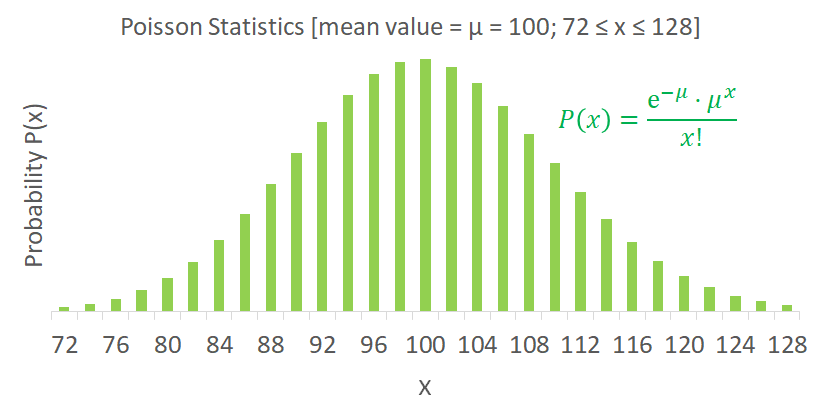

## tests

In [53]:
import matplotlib.pyplot as plt
import nest
import nest.voltage_trace

nest.set_verbosity("M_WARNING") # suppress info messages
nest.ResetKernel() # state is kept between runs
# (connections between nodes, status of neurons, devices and intrinsic time clocks)

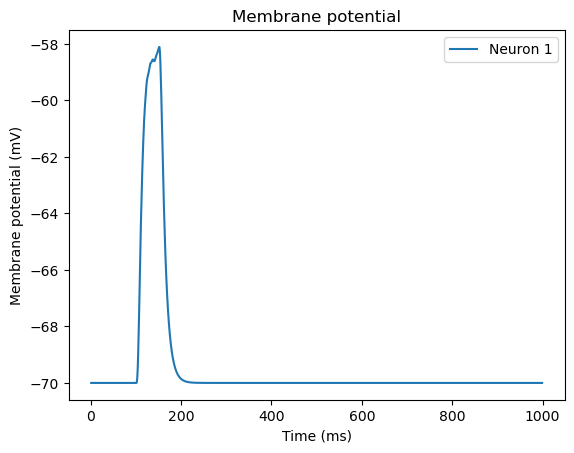

In [54]:
neuron = nest.Create("iaf_psc_alpha") # Create("..", num_neurons, {..})
idict = {"I_e": 300.0}
# nest.CopyModel("iaf_psc_alpha", "inh_iaf_psc_alpha", params=idict)
noise = nest.Create("poisson_generator", 1,{"start": 100.0, "stop": 150.0})
noise[0].rate = 80000.0
# nest.SetStatus(noise,[{"rate": 80000}, {"rate":15000}]) bulk update
voltmeter = nest.Create("voltmeter")


nest.Connect(noise, neuron, syn_spec={"weight": 0.7, "delay": 1.0})

nest.Connect(voltmeter, neuron)
nest.Simulate(1000.0) # milliseconds

nest.voltage_trace.from_device(voltmeter)
plt.show()

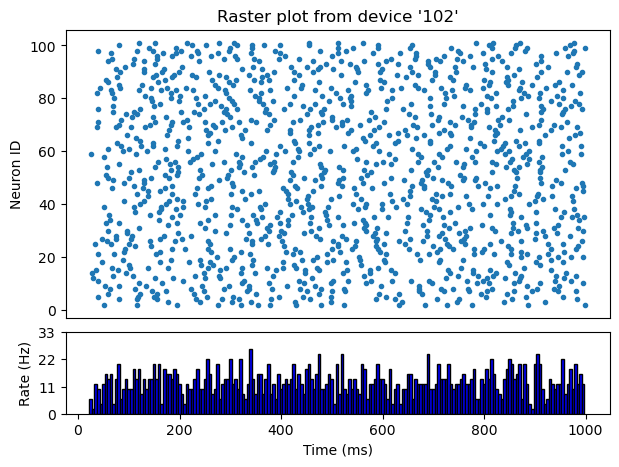

In [55]:
import nest
import numpy

nest.ResetKernel()

# Set simulation kernel
nest.SetKernelStatus({
  "local_num_threads": 1,
  "resolution": 0.1,
  "rng_seed": 1
})

# Create nodes
pg1 = nest.Create("poisson_generator", 1, params={
  "rate": 6500,
})
n1 = nest.Create("iaf_psc_alpha", 100)
sr1 = nest.Create("spike_recorder", 1)

# Connect nodes
nest.Connect(pg1, n1, syn_spec={ 
  "weight": 10,
})
nest.Connect(n1, sr1)

# Run simulation
nest.Simulate(1000)

nest.raster_plot.from_device(sr1, hist=True)

response = {
  "events": [sr1.events, ]
}